In [1]:
import sys
if ".." not in sys.path:
    sys.path.append("..")

In [2]:
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
import jax
import jax.numpy as jnp

from typing import Iterable

from model.cortical_column import CorticalColumn
from model.hyperparameters import dt, cortical_column_hyperparameters

In [4]:
def simulate_cortical_column(
    cortical_column: CorticalColumn,
    lrei: Iterable[jax.Array],
    lrii: Iterable[jax.Array],
    ei: Iterable[jax.Array],
    ii: Iterable[jax.Array],
):
    inputs = iter(zip(lrei, lrii, ei, ii))
    first_input = next(inputs)

    state = CorticalColumn.init_state(first_input[0].shape)
    # yield cortical_column.get_pyramidal_firing_rate(state, first_input[0]

    state, pfr, _ = cortical_column(state, *first_input)
    yield pfr

    for input in inputs:
        state, pfr, _ = cortical_column(state, *input)
        yield pfr

In [5]:
cortical_column = CorticalColumn(cortical_column_hyperparameters, dt)

In [6]:
T = 1
n = round(T / dt)
key = jax.random.key(1)

lrei = jnp.zeros((n,))
lrii = jnp.zeros((n,))
ei = 600*jnp.ones((n,))
ii = jnp.zeros((n,))
ei, ii = cortical_column.add_input_noise(key, ei, ii)

t = jnp.arange(0, T, dt)
psp = list(tqdm(simulate_cortical_column(cortical_column, lrei, lrii, ei, ii), total=n))  # type: ignore

100%|███████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6867.55it/s]


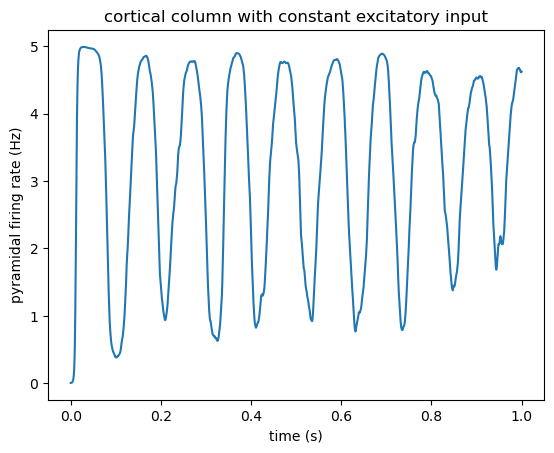

In [7]:
fig, ax = plt.subplots()
ax.plot(t, psp)
ax.set_title("cortical column with constant excitatory input")
ax.set_xlabel("time (s)")
ax.set_ylabel("pyramidal firing rate (Hz)")
plt.show()
fig.savefig("cortical_column.png")